In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/My Drive"
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive
/content/drive/My Drive


In [9]:
zh_df_clean = pd.read_csv('contents_zh.csv')

In [71]:
# zh_df_clean['timestamp'].head(10)
zh_df_clean['timestamp'] = pd.to_datetime(zh_df_clean['timestamp'])

start_date = pd.to_datetime('2022-06-01 00:00:00')
end_date = pd.to_datetime('2022-07-31 00:00:00')
filtered_df = zh_df_clean[(zh_df_clean['timestamp'] >= start_date) & (zh_df_clean['timestamp'] <= end_date)]

In [72]:
filtered_df['timestamp']

254064   2022-06-01
254065   2022-06-01
254066   2022-06-01
254067   2022-06-01
254068   2022-06-01
            ...    
326456   2022-07-31
326461   2022-07-31
326463   2022-07-31
326503   2022-07-31
326512   2022-07-31
Name: timestamp, Length: 71924, dtype: datetime64[ns]

In [2]:
zh_df = pd.read_csv('sent_ana/zh.csv')

In [23]:
zh_df.head()


,docid,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,share_count,...,headline,content,md5(author),pubname,pubcode,pubtype,region,fans_count,language,pos_score
0,2021100100000030804,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,功夫茶三圓䮭路閃耀中華,\n\n功夫茶三圓䮭路閃耀中華\n\n金駒\n\n01/10/2021\n\n今日沙田馬場編...,d41d8cd98f00b204e9800998ecf8427e,東方報業集團,wm_oncchk,U,NaN,NaN,zh,0.000000e+00
1,2021100100000031413,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,陳浩鈴寄語師弟妹放膽衝,\n\n陳浩鈴獲頒「最有價值運動員」獎項。\n\n香港壁球總會周三（29日）在香港會議展覽中...,d41d8cd98f00b204e9800998ecf8427e,東方日報網,wm_orientaldailyhk,U,NaN,NaN,zh,2.651084e-09
2,2021100100000031414,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,笑看天下：岸田文雄執政幾耐,\n\n政治一日也嫌長。日本執政自民黨日前舉行總裁選舉投票，推選新總裁，接替民望低、放棄連任...,d41d8cd98f00b204e9800998ecf8427e,東方日報網,wm_orientaldailyhk,U,NaN,NaN,zh,3.742340e-12
3,2021100100000033085,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,【恒大危機】傳部分恒大債權人 仍未收到美元債券到期利息,\n\n據外電引述消息人士透露，處於水深火熱的發展商中國恒大（03333）部分債權人未收到恒...,d41d8cd98f00b204e9800998ecf8427e,香港經濟日報網,wm_hkethk,U,NaN,NaN,zh,0.000000e+00
4,2021100100000033910,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,產評：全球股市迎血洗 撥亂反正必經路,\n\n全球股市第三季走勢反覆，中國資產沽壓尤大，港股表現差絕全球。面對中國經濟風險集中爆發...,d41d8cd98f00b204e9800998ecf8427e,東方報業集團,wm_oncchk,U,NaN,NaN,zh,2.668976e-13


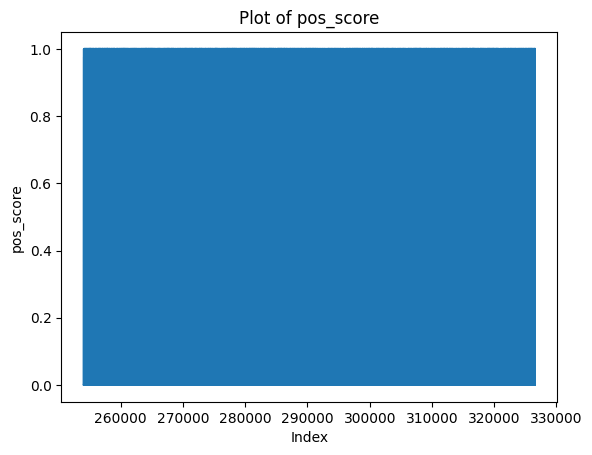

In [40]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column named 'pos_score'
plt.plot(zh_df['pos_score'][254064:326512])
plt.xlabel('Index')
plt.ylabel('pos_score')
plt.title('Plot of pos_score')
plt.show()

In [53]:
import json

with open('topic_docidx_dict_2.json') as file:
    # Load the JSON data
    data = json.load(file)

In [52]:
data['1'][100000]

2703646

In [73]:
filtered_numbers = [num for num in data['1'] if 254064    <= num <= 326512   ]


In [74]:
len(filtered_numbers)

6767

In [59]:
filtered_numbers

[612890,
 612895,
 612896,
 612898,
 612910,
 612933,
 612945,
 612948,
 612950,
 612965,
 612966,
 612967,
 612969,
 612970,
 612978,
 612980,
 612991,
 613029,
 613035,
 613056,
 613070,
 613081,
 613082,
 613085,
 613114,
 613124,
 613131,
 613134,
 613141,
 613162,
 613165,
 613171,
 613173,
 613183,
 613210,
 613212,
 613246,
 613250,
 613253,
 613262,
 613290,
 613317,
 613323,
 613341,
 613364,
 613384,
 613411,
 613423,
 613445,
 613446,
 613490,
 613500,
 613505,
 613511,
 613514,
 613517,
 613538,
 613541,
 613549,
 613558,
 613578,
 613582,
 613593,
 613599,
 613630,
 613631,
 613641,
 613672,
 613675,
 613676,
 613678,
 613710,
 613728,
 613729,
 613740,
 613761,
 613770,
 613810,
 613811,
 613845,
 613867,
 613901,
 613919,
 613920,
 613921,
 613956,
 613964,
 614062,
 614073,
 614077,
 614097,
 614119,
 614137,
 614144,
 614148,
 614153,
 614161,
 614230,
 614231,
 614244,
 614247,
 614278,
 614298,
 614367,
 614392,
 614399,
 614480,
 614481,
 614508,
 614521,
 614545,
 

In [75]:
pos_scores = zh_df.loc[filtered_numbers, "pos_score"]
filter_timestamp = zh_df_clean.loc[filtered_numbers, 'timestamp']


In [76]:
# Create a new DataFrame with 'filter_timestamp' and 'pos_scores'
weekly_data = pd.DataFrame({'timestamp': filter_timestamp, 'pos_score': pos_scores})

# Convert 'timestamp' column to datetime if it is not already
weekly_data['timestamp'] = pd.to_datetime(weekly_data['timestamp'])

# Set 'timestamp' as the index of the DataFrame
weekly_data.set_index('timestamp', inplace=True)

# Resample the data on a weekly basis and calculate the average of 'pos_score'
weekly_average = weekly_data.resample('W').mean()

# Reset the index to make 'timestamp' a column again
weekly_average.reset_index(inplace=True)
print(weekly_average)


   timestamp  pos_score
0 2022-06-05   0.052514
1 2022-06-12   0.056736
2 2022-06-19   0.048354
3 2022-06-26   0.058833
4 2022-07-03   0.067980
5 2022-07-10   0.056303
6 2022-07-17   0.063714


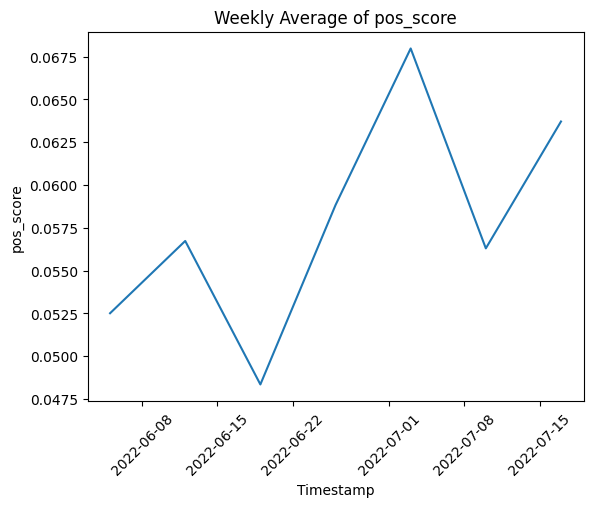

In [77]:
# Plot the 'pos_score' column
plt.plot(weekly_average['timestamp'], weekly_average['pos_score'])
plt.xlabel('Timestamp')
plt.ylabel('pos_score')
plt.title('Weekly Average of pos_score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()